<a href="https://colab.research.google.com/github/HK-hy3/Road-Accident-Analysis/blob/main/Road_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import zipfile
import requests
import os

# GitHub raw ZIP file URL
zip_url = "https://raw.githubusercontent.com/HK-hy3/Road-Accident-Analysis/main/Road%20Accident%20Data.csv.zip"

# Download the ZIP file
zip_path = "/content/road_accident_data.zip"
response = requests.get(zip_url, stream=True)

with open(zip_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/")

print(" Dataset extracted successfully!")

# Find the extracted CSV file
extracted_files = os.listdir("/content/")
csv_file = [file for file in extracted_files if file.endswith(".csv")][0]  # Finds the first CSV file

# Load the dataset
df = pd.read_csv(f"/content/{csv_file}")

# Display first few rows
print("Dataset loaded successfully!")
df.head()


 Dataset extracted successfully!
Dataset loaded successfully!


,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')


In [6]:

#df.to_csv('/content/drive/My Drive/road_accident_dataset.csv', index=False)

# Load Dataset

In [7]:
#df = pd.read_csv("/content/Road Accident Data.csv")

df.head()  # View first few rows
df.info()  # Check data types
df.describe()  # Summary statistics
df.isnull().sum()  # Check for missing values
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

# Convert Date column to datetime format


In [8]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['DayOfWeek'] = df['Day_of_Week']
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour  # Handling possible missing times


<ipython-input-8-26f03a2f6e52>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour  # Handling possible missing times


# --- 1. Frequency of Accidents Over Time ---

Total number of accidents: 307973


<ipython-input-9-28fbac44e2b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='coolwarm')


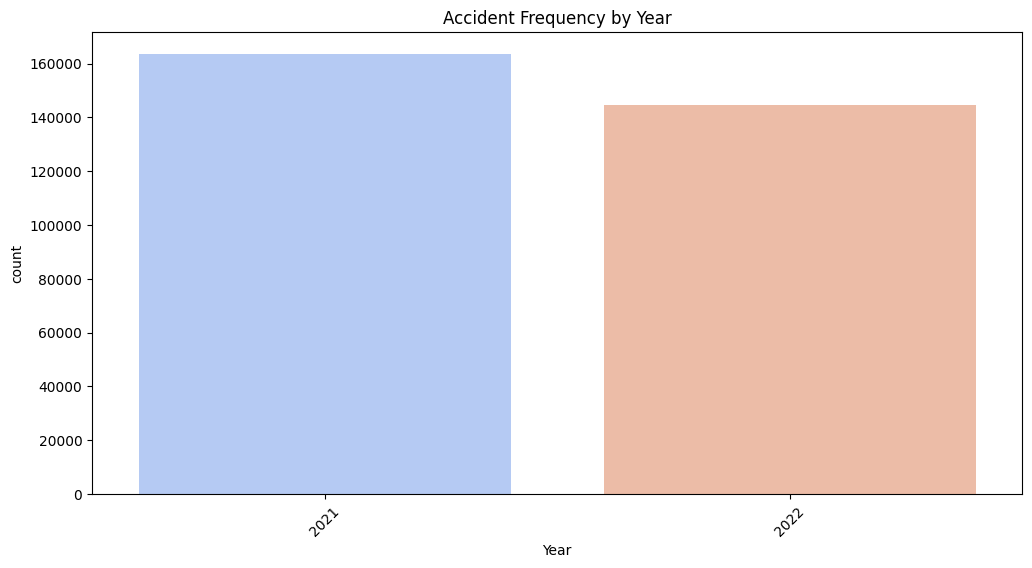

<ipython-input-9-28fbac44e2b7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='coolwarm')


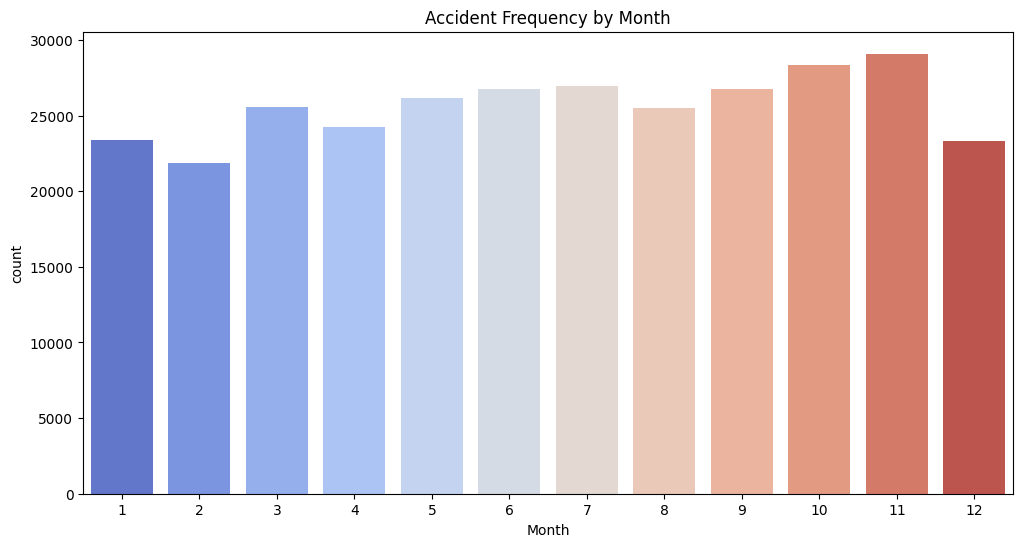

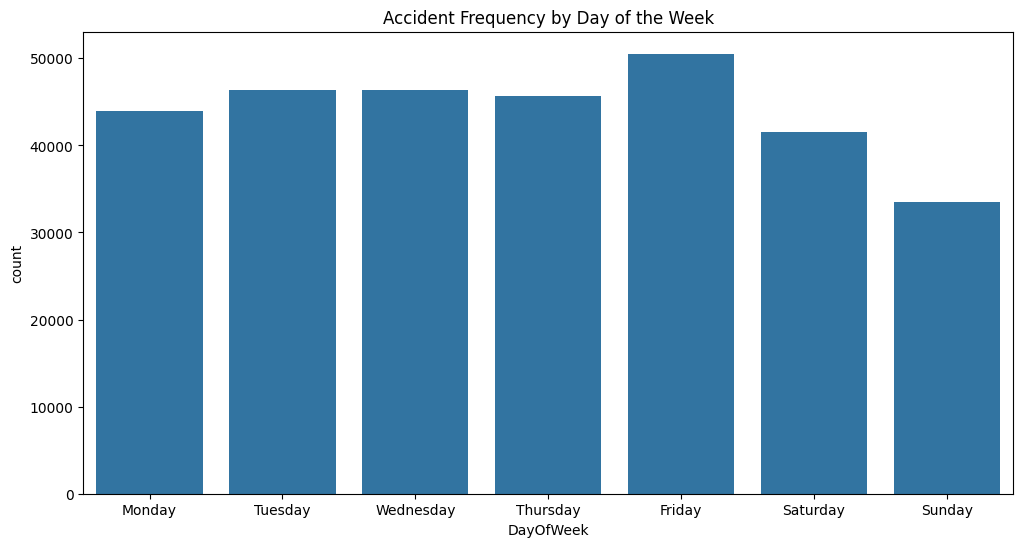

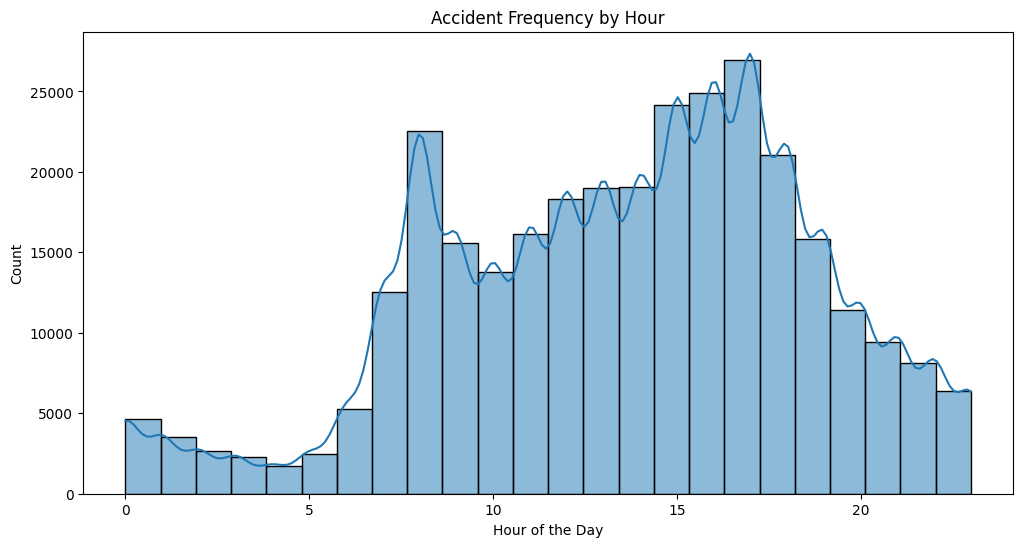

In [9]:
print("Total number of accidents:", len(df))
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='coolwarm')
plt.title("Accident Frequency by Year")
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='coolwarm')
plt.title("Accident Frequency by Month")
plt.show()

# Distribution of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accident Frequency by Day of the Week")
plt.show()

# Distribution of accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accident Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.show()


**Accident frequency by year**:

This bar chart shows the total number of accidents recorded per year, helping identify trends over time. A decrease might indicate successful traffic management, better road infrastructure, or stricter laws.

**Accident frequency by month**:

This chart represents the number of accidents occurring each month, helping detect seasonal patterns.
Certain months with higher accident rates might be because of weather conditions,holidays and festival periods, leading to increased travel and risk-taking behavior.
The uniform distribution across some months, suggests that seasonality does not significantly impact accident occurrences.

**Accident frequency by the week**:

This chart shows how accidents are distributed across different weekdays.
Higher accident rates by the end of the week indicate leisure travel and late-night drivingand higher chances of drunk driving incidents.
If weekday accidents are more frequent, rush-hour traffic congestion is likely a major factor.

**Accident Frequency by Hour of the Day:**

This histogram helps identify peak accident times across a 24-hour period.
Evening peaks suggest that accidents are concentrated during rush hours.
High late-night accidents could be due to:

Fatigue-related crashes.

Speeding and reckless driving.

Drunk driving incidents.


# --- 2. Geographical Distribution ---

Top 10 accident locations:
Local_Authority_(District)
Birmingham          6165
Leeds               4140
Manchester          3132
Bradford            3006
Westminster         2811
Sheffield           2750
Liverpool           2611
Cornwall            2606
Barnet              2302
Bristol, City of    2270
Name: count, dtype: int64


<ipython-input-10-f6f9f133618f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Local_Authority_(District)'].value_counts().index[:10], y=df['Local_Authority_(District)'].value_counts().values[:10], palette='coolwarm')


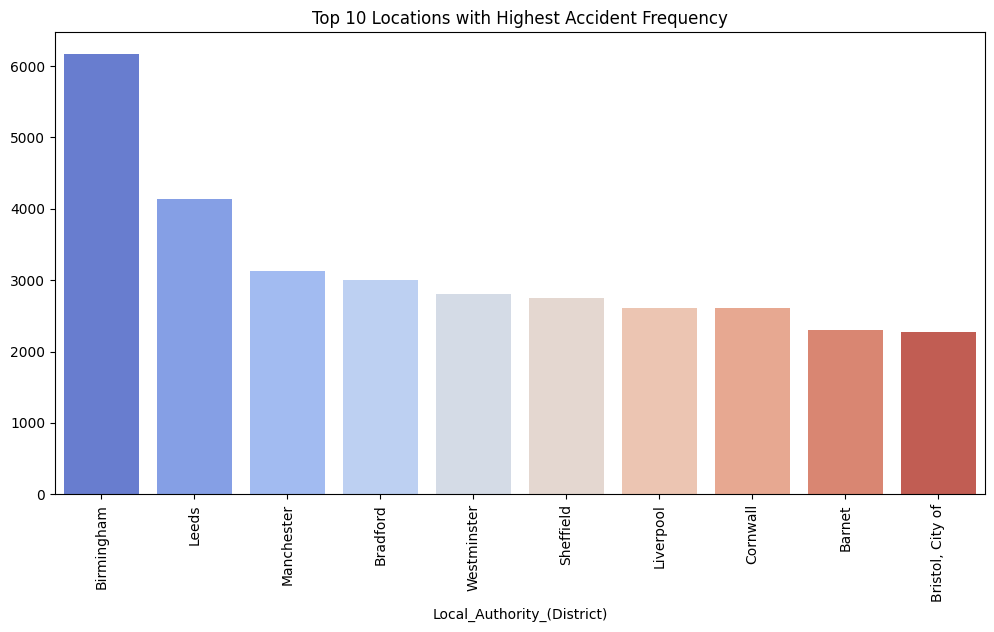

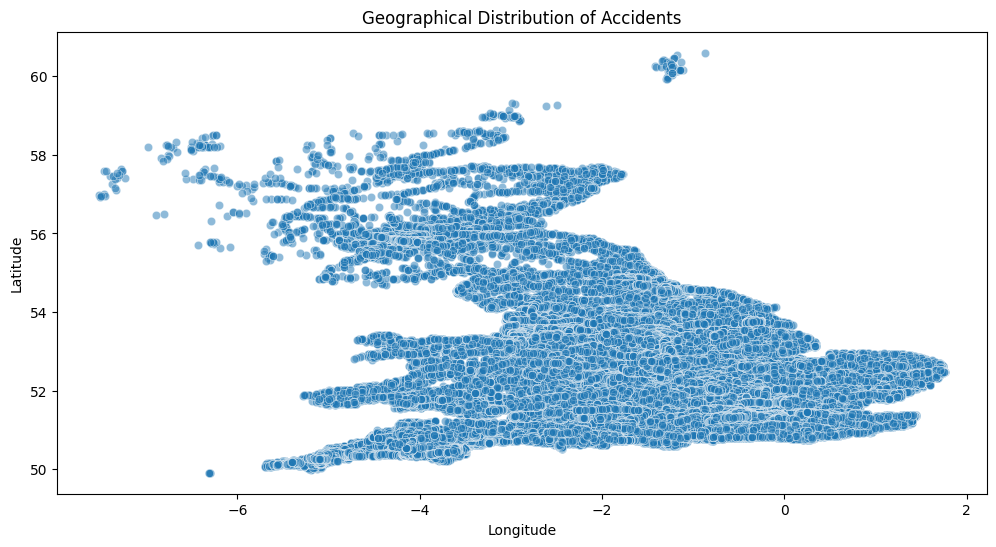

In [10]:
print("Top 10 accident locations:")
print(df['Local_Authority_(District)'].value_counts().head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Local_Authority_(District)'].value_counts().index[:10], y=df['Local_Authority_(District)'].value_counts().values[:10], palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Top 10 Locations with Highest Accident Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.5)
plt.title("Geographical Distribution of Accidents")
plt.show()


**Top 10 Locations with Highest Accident Frequency:**

This bar chart highlights districts or cities with the highest accident numbers, identifying accident hotspots.
Locations with significantly higher accident rates are likely due to:

High population density and vehicle congestion.

Poor road infrastructure or dangerous intersections.

Inadequate traffic management.


**Geographical Distribution of Accidents:**

This scatter plot maps accident locations using latitude and longitude.
Clusters of accidents indicate high-risk zones that require enhanced safety measures.
Evenly distributed zones indicate that there may be no specific high-risk but general improvements in road safety might be needed.


# --- 3. Accident Severity Analysis ---

Accident Severity Distribution:
Accident_Severity
Slight     85.488014
Serious    13.228432
Fatal       1.283554
Name: proportion, dtype: float64


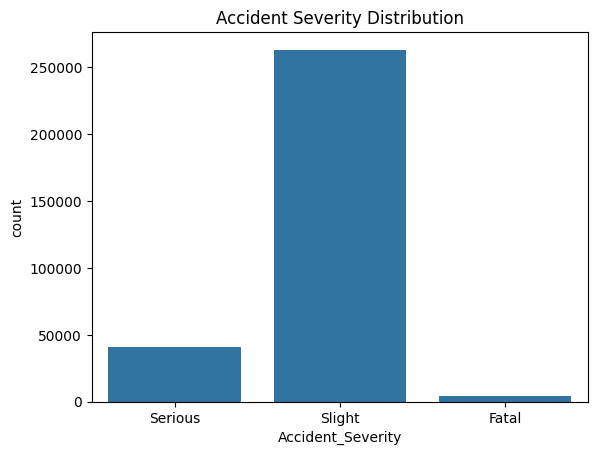

In [11]:
severity_counts = df['Accident_Severity'].value_counts(normalize=True) * 100
print("Accident Severity Distribution:")
print(severity_counts)
sns.countplot(x='Accident_Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


**Accident Severity Distribution:**

This bar chart categorizes accidents based on severity levels: Fatal, Serious, or Slight.

Most accidents are "Slight" hence it suggests that low-severity incidents are common.



# --- 4. Demographic Insights ---

In [12]:
if 'Age_of_Casualty' in df.columns:
    df['Age_Group'] = pd.cut(df['Age_of_Casualty'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Age_Group', data=df, order=['0-18', '19-30', '31-50', '51-70', '71+'])
    plt.title("Accident Involvement by Age Group")
    plt.show()
else:
    print("No age data available in this dataset. Skipping age analysis.")

if 'Gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=df)
    plt.title("Accident Involvement by Gender")
    plt.show()
elif 'Sex_of_Casualty' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Sex_of_Casualty', data=df)
    plt.title("Accident Involvement by Sex")
    plt.show()
else:
    print("No gender data available in this dataset. Skipping gender analysis.")

if 'Gender' in df.columns and 'Accident_Severity' in df.columns:
    contingency_table = pd.crosstab(df['Gender'], df['Accident_Severity'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print("Chi-Square Test for Gender vs. Accident Severity:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print("There is a significant difference in accident severity based on gender.")
    else:
        print("No significant difference in accident severity based on gender.")


No age data available in this dataset. Skipping age analysis.
No gender data available in this dataset. Skipping gender analysis.


# --- 5. Environmental and Road Conditions ---

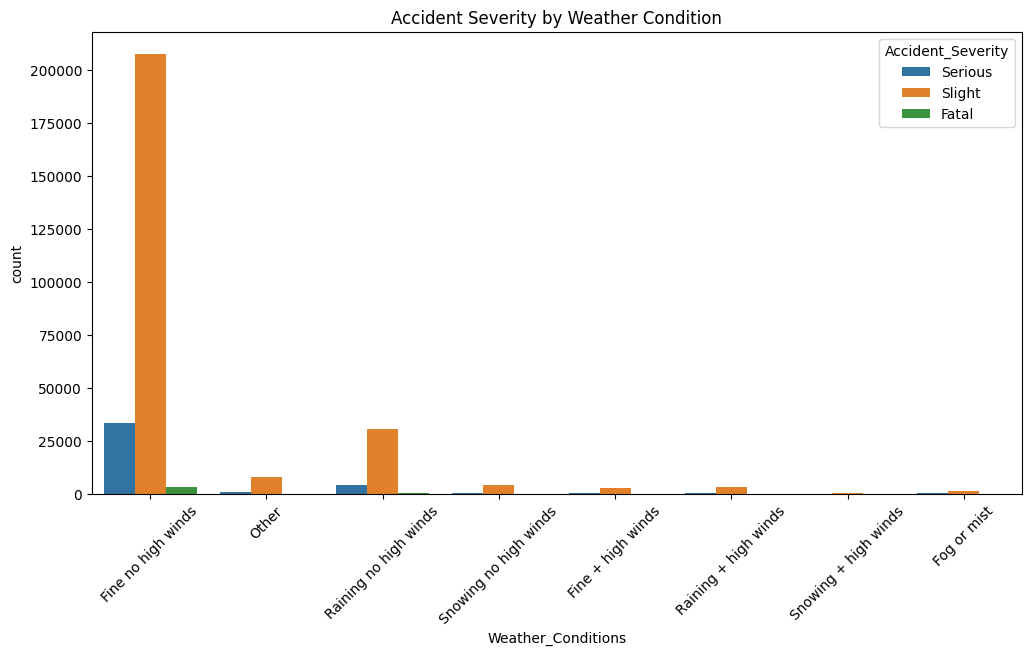

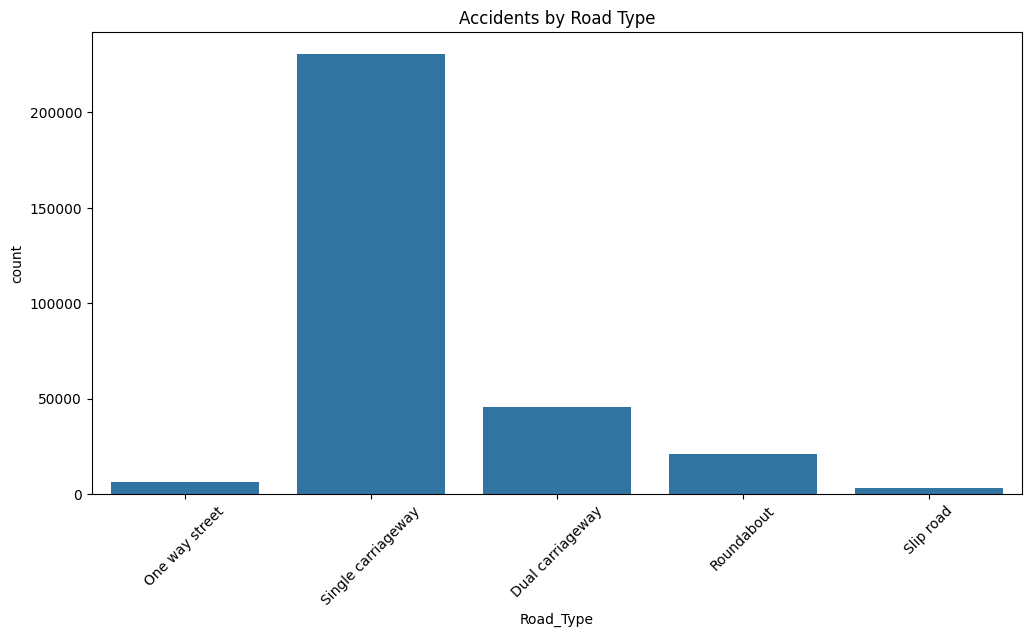

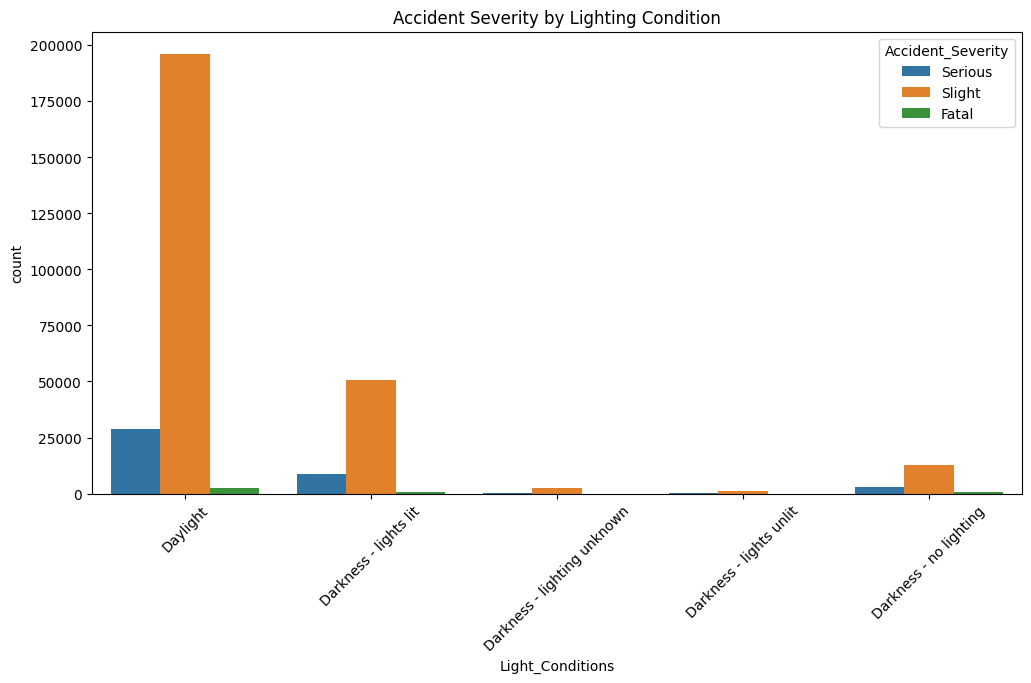

In [13]:
if 'Weather_Conditions' in df.columns and 'Accident_Severity' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=df)
    plt.xticks(rotation=45)
    plt.title("Accident Severity by Weather Condition")
    plt.show()
else:
    print("No weather condition or severity data available. Skipping analysis.")

if 'Road_Type' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Road_Type', data=df)
    plt.xticks(rotation=45)
    plt.title("Accidents by Road Type")
    plt.show()
else:
    print("No road type data available. Skipping analysis.")

if 'Light_Conditions' in df.columns and 'Accident_Severity' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Light_Conditions', hue='Accident_Severity', data=df)
    plt.xticks(rotation=45)
    plt.title("Accident Severity by Lighting Condition")
    plt.show()
else:
    print("No lighting condition or severity data available. Skipping analysis.")


**Accident Severity by Weather Condition:**

This bar chart shows how accident severity varies under different weather conditions.

If accident rates in bad weather (e.g., fog, rain, snow), key reasons include:
Reduced visibility and slippery roads.
Need for better speed regulations and safety awareness.

If clear weather has the slight severity accidents, it means reckless driving, speeding conditions.

**Accidents by Road Type**

This bar chart compares accident rates on highways, urban roads, and rural roads.

Single Carriageway accidents tend to be more severe due to higher speeds.
Dual Carriageway accidents are due to traffic congestion and pedestrian interactions.


**Accident Severity by Lighting Condition**


This bar chart shows how accident severity differs under daylight, dusk, and nighttime conditions.

Daylight accidents being high suggests that traffic congestion is a key factor.


# --- 6. Vehicle and Driver Information ---

Most common vehicle types involved in accidents:
Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Name: count, dtype: int64


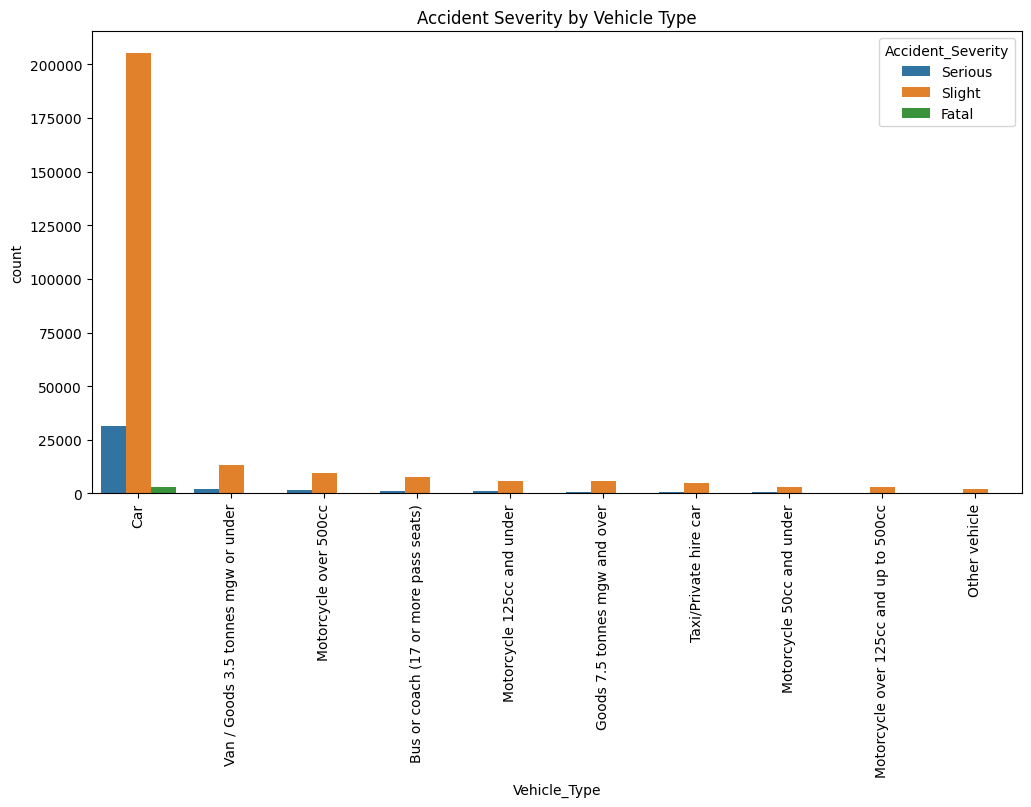

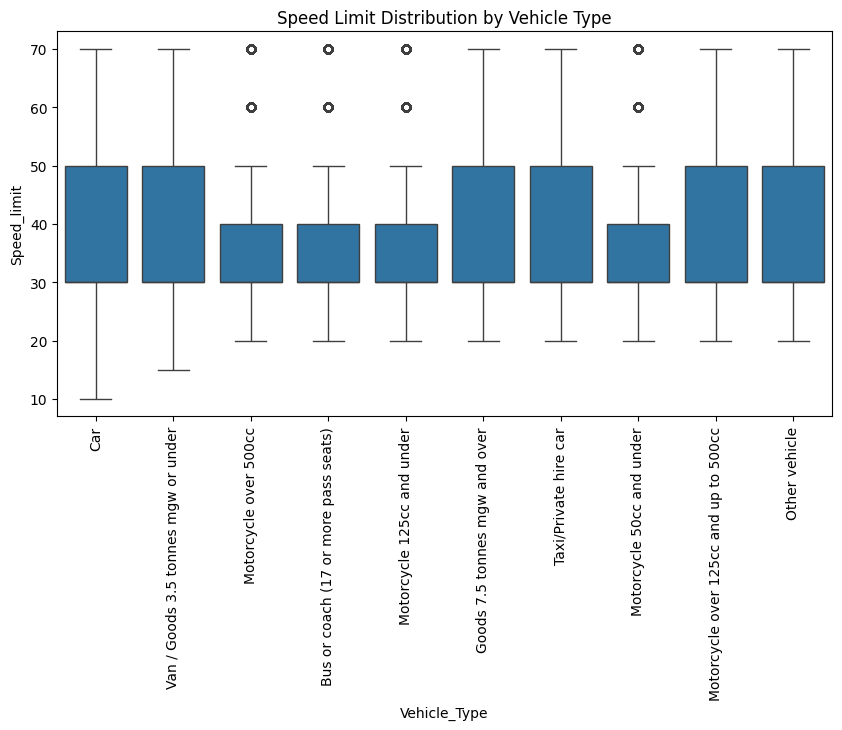

In [14]:
print("Most common vehicle types involved in accidents:")
print(df['Vehicle_Type'].value_counts().head(10))

if 'Vehicle_Type' in df.columns and 'Accident_Severity' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Vehicle_Type', hue='Accident_Severity', data=df, order=df['Vehicle_Type'].value_counts().index[:10])
    plt.xticks(rotation=90)
    plt.title("Accident Severity by Vehicle Type")
    plt.show()

if 'Speed_limit' in df.columns and 'Vehicle_Type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Vehicle_Type', y='Speed_limit', data=df, order=df['Vehicle_Type'].value_counts().index[:10])
    plt.xticks(rotation=90)
    plt.title("Speed Limit Distribution by Vehicle Type")
    plt.show()

**Accident Severity by Vehicle Type**

This bar chart compares accident severity (Fatal, Serious, Slight) across vehicle types.
If trucks and buses have fewer severe accidents, it might be because:
They are larger and more stable, leading to less severe damage in minor collisions.
Speed restrictions and safety regulations play a role.
Cars dominate total accident numbers, it may be due to their high presence on roads, rather than inherent risk.


**Speed Limit Distribution by Vehicle Type**
This box plot shows the distribution of speed limits involving different vehicle types.


# --- 7. Temporal Patterns ---

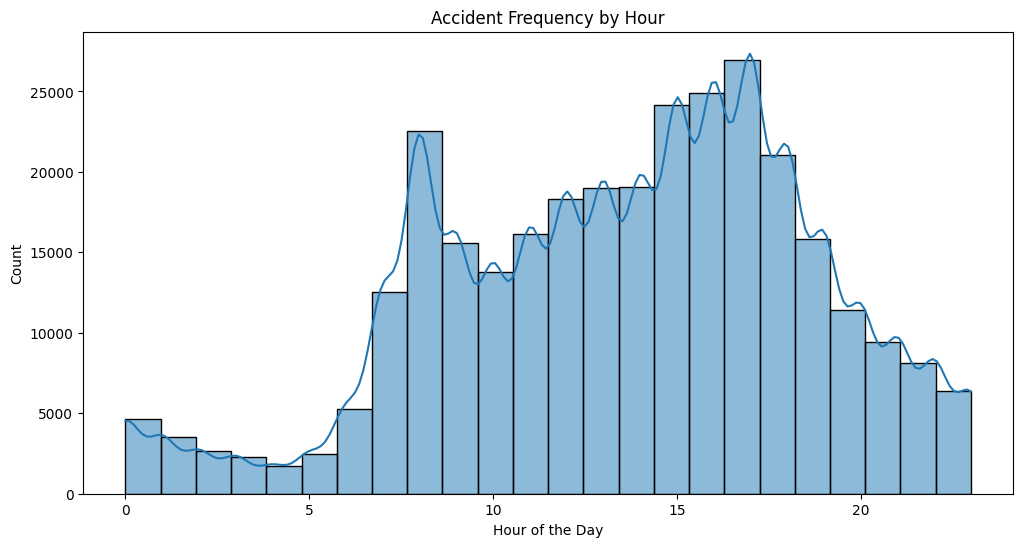

<ipython-input-15-caf6379fa273>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekend', data=df, palette='coolwarm')


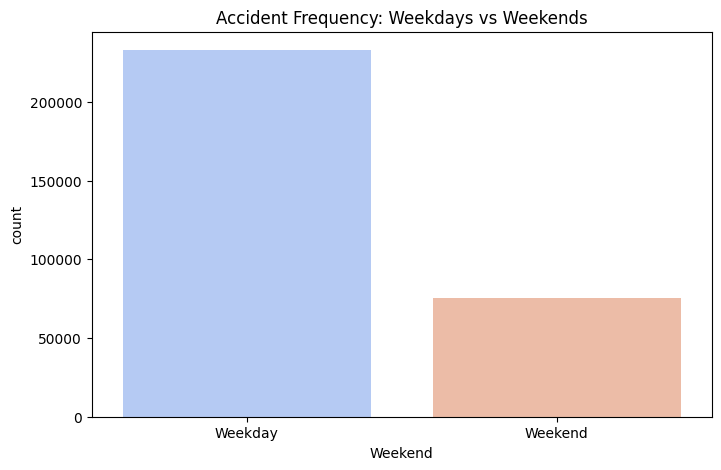

In [15]:
# Peak accident times during the day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accident Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.show()

# Weekday vs Weekend comparison
if 'DayOfWeek' in df.columns:
    df['Weekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Weekend', data=df, palette='coolwarm')
    plt.title("Accident Frequency: Weekdays vs Weekends")
    plt.show()

**Accident Frequency by Hour**

This histogram shows the number of accidents at different hours of the day, helping to identify peak accident times.

Evening peaks suggest that accidents are concentrated during rush hours when traffic density is highest.

Late-night spikes may indicate:

Fatigue-related crashes.

Speeding and reckless driving.

Drunk driving incidents.


**Weekday vs Weekend Comparison**

This bar chart compares accident frequency on weekdays vs weekends.

Higher accidents on weekdays suggest:

Rush-hour traffic congestion is a major factor.
More work-related travel leads to increased commuter accidents.
If the distribution is even, it may indicate that accidents occur due to general road conditions rather than time-based factors.

# --- 8. Contributing Factors ---

Top contributing factors to accidents:

Junction Control:
Junction_Control
Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32349
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Name: count, dtype: int64

Carriageway Hazards:
Carriageway_Hazards
Other object on road                               2243
Any animal in carriageway (except ridden horse)    1620
Pedestrian in carriageway - not injured             715
Previous accident                                   511
Vehicle load on road                                335
Name: count, dtype: int64

Road Surface Conditions:
Road_Surface_Conditions
Dry                     208967
Wet or damp              81479
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

Weather Conditions:
Weather_Conditions
Fine

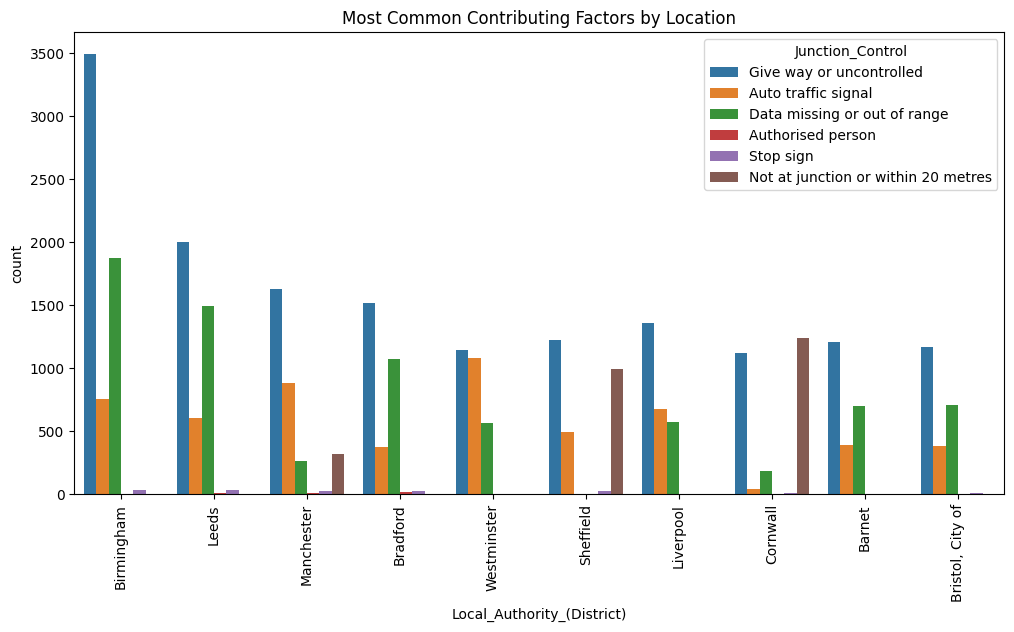

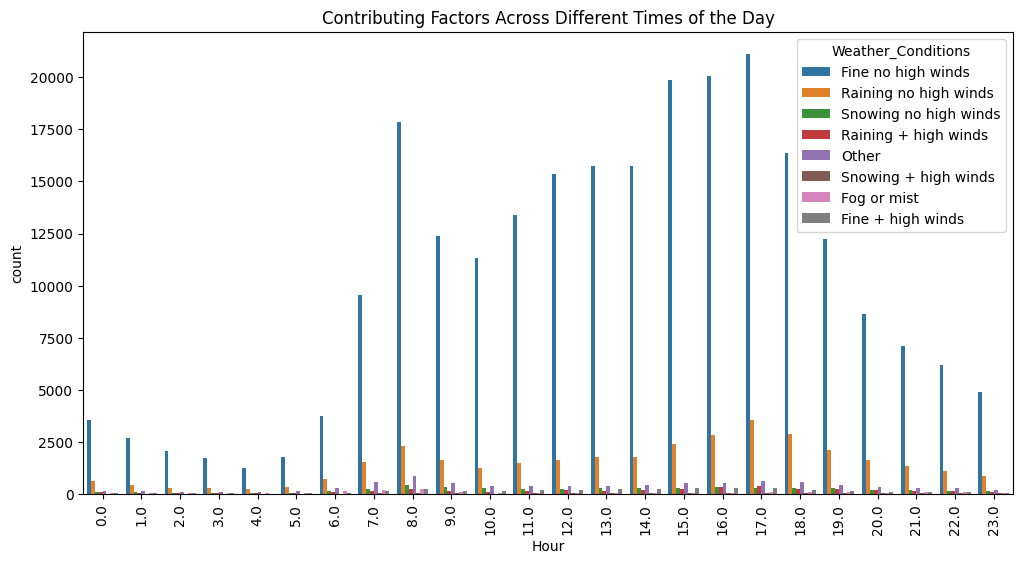

In [16]:
print("Top contributing factors to accidents:")
if 'Junction_Control' in df.columns:
    print("\nJunction Control:")
    print(df['Junction_Control'].value_counts().head(10))
if 'Carriageway_Hazards' in df.columns:
    print("\nCarriageway Hazards:")
    print(df['Carriageway_Hazards'].dropna().value_counts().head(10))
if 'Road_Surface_Conditions' in df.columns:
    print("\nRoad Surface Conditions:")
    print(df['Road_Surface_Conditions'].value_counts().head(10))
if 'Weather_Conditions' in df.columns:
    print("\nWeather Conditions:")
    print(df['Weather_Conditions'].value_counts().head(10))

if 'Local_Authority_(District)' in df.columns and 'Junction_Control' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Local_Authority_(District)', hue='Junction_Control', data=df, order=df['Local_Authority_(District)'].value_counts().index[:10])
    plt.xticks(rotation=90)
    plt.title("Most Common Contributing Factors by Location")
    plt.show()

if 'Hour' in df.columns and 'Weather_Conditions' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Hour', hue='Weather_Conditions', data=df)
    plt.xticks(rotation=90)
    plt.title("Contributing Factors Across Different Times of the Day")
    plt.show()


**Most Common Contributing Factors by Location**

This bar chart shows the top 10 locations (districts) with the most accidents, categorized by junction control type.

A particular district with many "Give way or uncontrolled" junctions, suggests lack of proper traffic control measures contributes to accidents in that area.

"Auto traffic signals" have high accident counts, it may indicate:
Red-light running,Confusing or malfunctioning traffic lights.

Districts with "Stop sign" or "Authorized person" show low accident numbers, suggests that strict enforcement helps reduce accidents.

**Contributing Factors Across Different Times of the Day**

This bar chart visualizes accident frequency by hour of the day, grouped by weather conditions.

# --- 9. Injury and Fatality Analysis ---

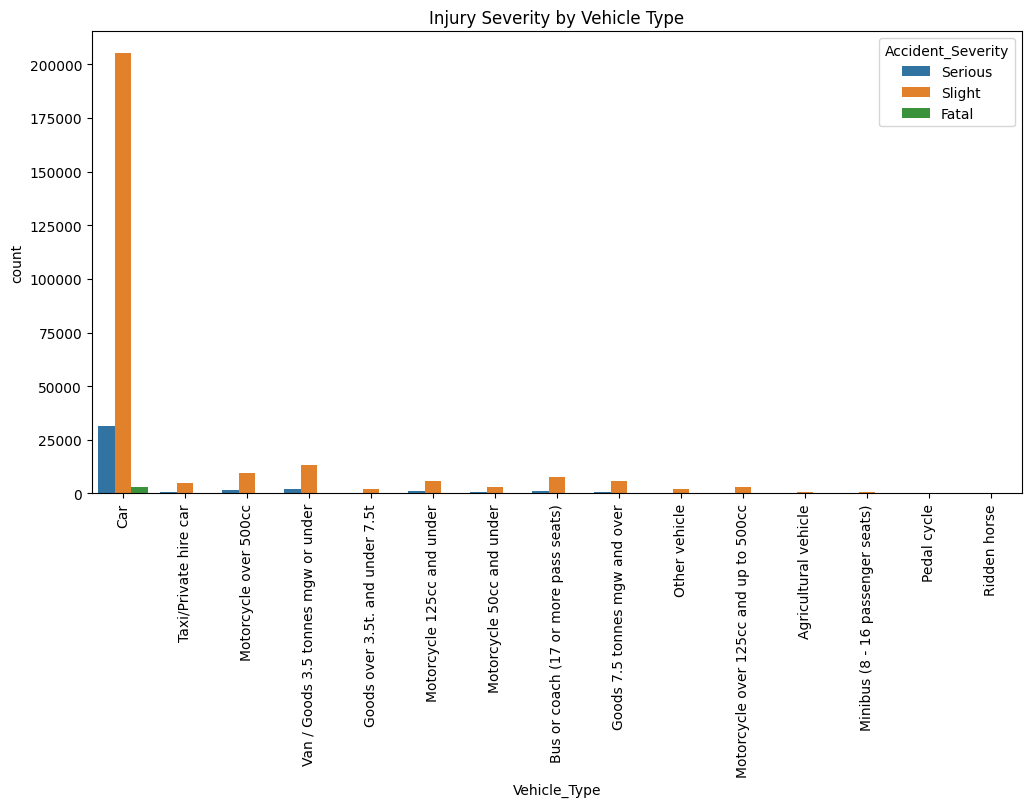

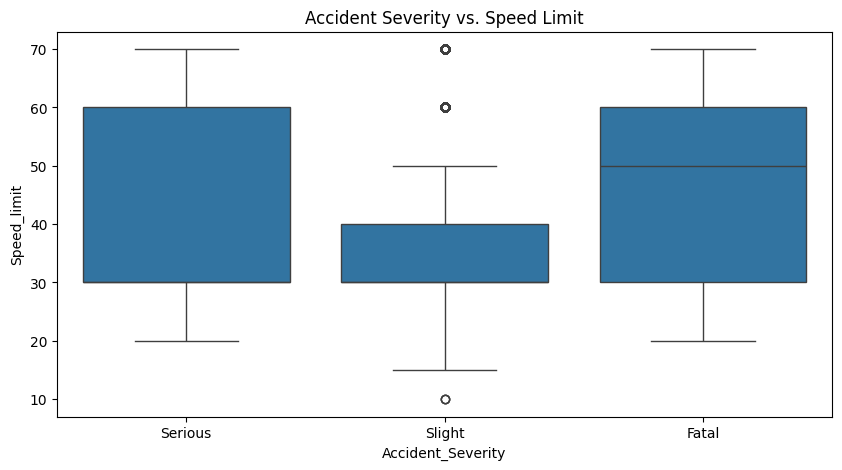

In [17]:
if 'Vehicle_Type' in df.columns and 'Accident_Severity' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Vehicle_Type', hue='Accident_Severity', data=df)
    plt.xticks(rotation=90)
    plt.title("Injury Severity by Vehicle Type")
    plt.show()
else:
    print("No vehicle type or severity data available. Skipping analysis.")

if 'Speed_limit' in df.columns and 'Accident_Severity' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df)
    plt.title("Accident Severity vs. Speed Limit")
    plt.show()
else:
    print("No speed limit or severity data available. Skipping analysis.")


**Injury Severity by Vehicle Type**

This bar chart compares different vehicle types involved in accidents and their corresponding injury severity levels (Fatal, Serious, Slight).
Cars and SUVs dominate the total number of accidents,because they are more common on the roads.

**Accident Severity vs. Speed Limit**

This box plot analyzes the relationship between speed limits and accident severity.

If higher speed limits correlate with more fatal or serious accidents, it confirms that speeding significantly increases accident severity.

If low-speed accidents still show fatalities, possible causes include:
Pedestrian or cyclist collisions in urban areas.


# --- 10. Comparative Analysis ---

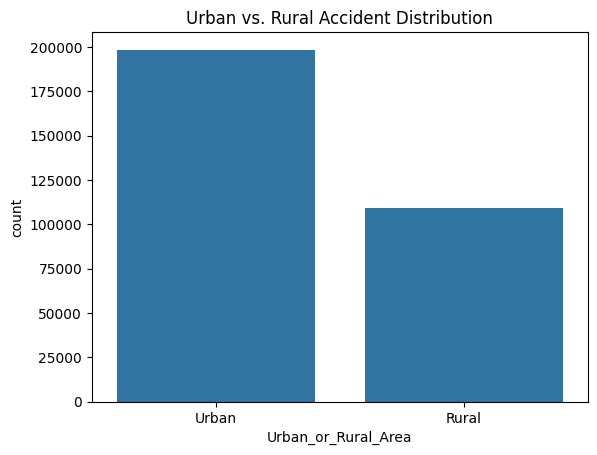

Analysis Complete.


In [18]:
sns.countplot(x='Urban_or_Rural_Area', data=df)
plt.title("Urban vs. Rural Accident Distribution")
plt.show()

print("Analysis Complete.")

**Urban vs. Rural Accident Distribution**

A bar chart comparing urban vs. rural accident occurrences.


Urban areas tend to have more accidents due to higher vehicle density and congestion.

Rural accidents are due to high speeds on open roads and delayed medical response times.